In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
cardio_data=pd.read_excel('cardiocare.xlsx')

In [4]:
cardio_data.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,thalach,oldpeak,cp,restcg,exang,active,cardio,Unnamed: 18
0,0,18393,2,168,62.0,110,80,1,1,0,0,?,?,?,?,?,1,0,NaN
1,1,20228,1,156,85.0,140,90,3,1,0,0,?,?,?,?,?,1,1,NaN
2,2,18857,1,165,64.0,130,70,3,1,0,0,?,?,?,?,?,0,1,NaN
3,3,17623,2,169,82.0,150,100,1,1,0,0,?,?,?,?,?,1,1,NaN
4,4,17474,1,156,56.0,100,60,1,1,0,0,?,?,?,?,?,0,0,NaN
5,8,21914,1,151,67.0,120,80,2,2,0,0,?,?,?,?,?,0,0,NaN
6,9,22113,1,157,93.0,130,80,3,1,0,0,?,?,?,?,?,1,0,NaN
7,12,22584,2,178,95.0,130,90,3,3,0,0,?,?,?,?,?,1,1,NaN
8,13,17668,1,158,71.0,110,70,1,1,0,0,?,?,?,?,?,1,0,NaN
9,14,19834,1,164,68.0,110,60,1,1,0,0,?,?,?,?,?,0,0,NaN


In [5]:
cardio_data.shape

(70295, 19)

In [6]:
cardio_data.sample(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,thalach,oldpeak,cp,restcg,exang,active,cardio,Unnamed: 18
22362,31943,20305,1,160,83.0,120,80,1,1,0,0,?,?,?,?,?,1,0,NaN
37407,53417,18228,1,155,72.0,120,80,1,1,0,0,?,?,?,?,?,1,0,NaN
64183,91607,21266,1,156,55.0,120,80,1,1,0,0,?,?,?,?,?,1,0,NaN
14450,20649,23474,1,167,64.0,160,90,2,1,0,0,?,?,?,?,?,1,1,NaN
37243,53202,17422,1,163,118.0,160,100,1,1,0,0,?,?,?,?,?,0,0,NaN
2691,3796,22744,2,158,67.0,120,80,1,1,0,0,?,?,?,?,?,1,0,NaN
33353,47653,21668,2,162,64.0,140,70,1,1,0,0,?,?,?,?,?,1,0,NaN
60277,86064,20320,2,168,91.0,160,80,1,1,0,0,?,?,?,?,?,0,1,NaN
58399,83339,21956,2,172,68.0,110,70,3,3,0,0,?,?,?,?,?,1,0,NaN
29589,42303,18882,1,160,58.0,110,70,1,1,0,0,?,?,?,?,?,1,0,NaN


In [7]:
cardio_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'thalach', 'oldpeak',
       'cp', 'restcg', 'exang', 'active', 'cardio', 'Unnamed: 18'],
      dtype='object')

In [8]:
cardio_data.drop(columns=['Unnamed: 18'], errors='ignore', inplace=True)

In [9]:
cardio_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'thalach', 'oldpeak',
       'cp', 'restcg', 'exang', 'active', 'cardio'],
      dtype='object')

In [10]:
cardio_data.isna().sum()

id               0
age            294
gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
cholesterol      0
glucose          0
smoke            0
alcohol          0
thalach          0
oldpeak          0
cp               0
restcg           0
exang            0
active           0
cardio           0
dtype: int64

In [11]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70295 non-null  object
 1   age          70001 non-null  object
 2   gender       70295 non-null  object
 3   height       70295 non-null  object
 4   weight       70295 non-null  object
 5   ap_hi        70295 non-null  object
 6   ap_lo        70295 non-null  object
 7   cholesterol  70295 non-null  object
 8   glucose      70295 non-null  object
 9   smoke        70295 non-null  object
 10  alcohol      70295 non-null  object
 11  thalach      70295 non-null  object
 12  oldpeak      70295 non-null  object
 13  cp           70295 non-null  object
 14  restcg       70295 non-null  object
 15  exang        70295 non-null  object
 16  active       70295 non-null  object
 17  cardio       70295 non-null  object
dtypes: object(18)
memory usage: 9.7+ MB


In [12]:
cardio_data["height"].value_counts()

height
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
71        1
76        1
119       1
97        1
81        1
Name: count, Length: 111, dtype: int64

In [13]:
cardio_data["weight"].value_counts()

weight
65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
59.8       1
55.6       1
80.6       1
90.7       1
64.1       1
Name: count, Length: 289, dtype: int64

In [14]:
#since thalach ,oldpeak,cp,restcg,exang have majorly null values we choose to drop as we cannot replace approximately majority of data using mean,median or mode
cardio_data.drop(columns=['id'], errors='ignore', inplace=True)
cardio_data.drop(columns=['thalach'], errors='ignore', inplace=True)
cardio_data.drop(columns=['oldpeak'], errors='ignore', inplace=True)
cardio_data.drop(columns=['cp'], errors='ignore', inplace=True)
cardio_data.drop(columns=['restcg'], errors='ignore', inplace=True)
cardio_data.drop(columns=['exang'], errors='ignore', inplace=True)

In [15]:
cardio_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'glucose', 'smoke', 'alcohol', 'active', 'cardio'],
      dtype='object')

In [16]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          70001 non-null  object
 1   gender       70295 non-null  object
 2   height       70295 non-null  object
 3   weight       70295 non-null  object
 4   ap_hi        70295 non-null  object
 5   ap_lo        70295 non-null  object
 6   cholesterol  70295 non-null  object
 7   glucose      70295 non-null  object
 8   smoke        70295 non-null  object
 9   alcohol      70295 non-null  object
 10  active       70295 non-null  object
 11  cardio       70295 non-null  object
dtypes: object(12)
memory usage: 6.4+ MB


In [17]:
cardio_data.isna().sum()

age            294
gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
cholesterol      0
glucose          0
smoke            0
alcohol          0
active           0
cardio           0
dtype: int64

In [18]:
# feature engineering main : height and weight=bmi done
# Dealing with null values:-
# ht and wt have null values too.. done
# age median daalna hai done 
# ap_hi null value treatment done
# smoke alcohol active mode done

In [19]:
cardio_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'glucose', 'smoke', 'alcohol', 'active', 'cardio'],
      dtype='object')

In [20]:
cardio_data['age'] = pd.to_numeric(cardio_data['age'], errors='coerce') 
cardio_data['gender'] = pd.to_numeric(cardio_data['gender'], errors='coerce') 
cardio_data['height'] = pd.to_numeric(cardio_data['height'], errors='coerce') 
cardio_data['weight'] = pd.to_numeric(cardio_data['weight'], errors='coerce') 
cardio_data['ap_hi'] = pd.to_numeric(cardio_data['ap_hi'], errors='coerce') 
cardio_data['ap_lo'] = pd.to_numeric(cardio_data['ap_lo'], errors='coerce') 
cardio_data['cholesterol'] = pd.to_numeric(cardio_data['cholesterol'], errors='coerce') 
cardio_data['glucose'] = pd.to_numeric(cardio_data['glucose'], errors='coerce') 
cardio_data['smoke'] = pd.to_numeric(cardio_data['smoke'], errors='coerce') 
cardio_data['alcohol'] = pd.to_numeric(cardio_data['alcohol'], errors='coerce') 
cardio_data['active'] = pd.to_numeric(cardio_data['active'], errors='coerce') 
cardio_data['cardio'] = pd.to_numeric(cardio_data['cardio'], errors='coerce') 

In [21]:
cardio_data.dtypes

age            float64
gender         float64
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol    float64
glucose        float64
smoke          float64
alcohol        float64
active         float64
cardio         float64
dtype: object

In [22]:
cardio_data.isna().sum()

age            295
gender           1
height         295
weight         295
ap_hi          295
ap_lo            1
cholesterol     24
glucose          9
smoke          295
alcohol        295
active         295
cardio           1
dtype: int64

In [23]:
median_age = cardio_data['age'].median()
print(median_age)

19703.0


In [24]:
cardio_data['age']=cardio_data['age'].fillna(median_age)

In [25]:
cardio_data.isna().sum()

age              0
gender           1
height         295
weight         295
ap_hi          295
ap_lo            1
cholesterol     24
glucose          9
smoke          295
alcohol        295
active         295
cardio           1
dtype: int64

In [26]:
cardio_data.isna().sum()

age              0
gender           1
height         295
weight         295
ap_hi          295
ap_lo            1
cholesterol     24
glucose          9
smoke          295
alcohol        295
active         295
cardio           1
dtype: int64

In [27]:
print(cardio_data.dtypes)

age            float64
gender         float64
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol    float64
glucose        float64
smoke          float64
alcohol        float64
active         float64
cardio         float64
dtype: object


In [28]:
mode_active = cardio_data['active'].mode()[0]
mode_alcohol = cardio_data['alcohol'].mode()[0]
mode_smoke = cardio_data['smoke'].mode()[0]
cardio_data['active'] = cardio_data['active'].fillna(mode_active)
cardio_data['alcohol'] = cardio_data['alcohol'].fillna(mode_alcohol)
cardio_data['smoke'] = cardio_data['smoke'].fillna(mode_smoke)

In [29]:
cardio_data.isna().sum()

age              0
gender           1
height         295
weight         295
ap_hi          295
ap_lo            1
cholesterol     24
glucose          9
smoke            0
alcohol          0
active           0
cardio           1
dtype: int64

In [30]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70295 non-null  float64
 1   gender       70294 non-null  float64
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  float64
 5   ap_lo        70294 non-null  float64
 6   cholesterol  70271 non-null  float64
 7   glucose      70286 non-null  float64
 8   smoke        70295 non-null  float64
 9   alcohol      70295 non-null  float64
 10  active       70295 non-null  float64
 11  cardio       70294 non-null  float64
dtypes: float64(12)
memory usage: 6.4 MB


In [31]:
print(cardio_data.dtypes)

age            float64
gender         float64
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol    float64
glucose        float64
smoke          float64
alcohol        float64
active         float64
cardio         float64
dtype: object


In [32]:
#median for systolic_bp (ap_hi) since it is skewed and median is a better choice because it is less affected by outliers
median_ap_hi = cardio_data['ap_hi'].median()
print(median_ap_hi)

120.0


In [33]:
cardio_data['ap_hi'].fillna(median_ap_hi)

0        110.0
1        140.0
2        130.0
3        150.0
4        100.0
         ...  
70290    120.0
70291    120.0
70292    120.0
70293    120.0
70294    120.0
Name: ap_hi, Length: 70295, dtype: float64

In [33]:
cardio_data['ap_hi'].fillna(median_ap_hi)

0        110.0
1        140.0
2        130.0
3        150.0
4        100.0
         ...  
70290    120.0
70291    120.0
70292    120.0
70293    120.0
70294    120.0
Name: ap_hi, Length: 70295, dtype: float64

In [33]:
cardio_data['ap_hi'].fillna(median_ap_hi)

0        110.0
1        140.0
2        130.0
3        150.0
4        100.0
         ...  
70290    120.0
70291    120.0
70292    120.0
70293    120.0
70294    120.0
Name: ap_hi, Length: 70295, dtype: float64

In [34]:
cardio_data.skew()
#ap_lo and ap_hi and cholesterol are two most skewed data

age            -0.308878
gender          0.623739
height         -0.642187
weight          1.012070
ap_hi          85.296214
ap_lo          32.135367
cholesterol    17.944609
glucose         2.404521
smoke           2.914008
alcohol         3.966467
active         -1.536061
cardio          0.003528
dtype: float64

In [35]:
cardio_data.shape

(70295, 12)

In [36]:
#median for height and weight since it is skewed and median is a better choice because it is less affected by outliers
median_height = cardio_data['height'].median()
print(median_height)

165.0


In [37]:
cardio_data['height'].fillna(median_height)

0        168.0
1        156.0
2        165.0
3        169.0
4        156.0
         ...  
70290    165.0
70291    165.0
70292    165.0
70293    165.0
70294    165.0
Name: height, Length: 70295, dtype: float64

In [38]:
median_weight = cardio_data['weight'].median()
print(median_weight)

72.0


In [39]:
cardio_data['weight'].fillna(median_weight)

0        62.0
1        85.0
2        64.0
3        82.0
4        56.0
         ... 
70290    72.0
70291    72.0
70292    72.0
70293    72.0
70294    72.0
Name: weight, Length: 70295, dtype: float64

In [40]:
cardio_data['height'] = cardio_data['height'] / 100

# Calculate BMI
cardio_data['BMI'] = cardio_data['weight'] / (cardio_data['height'] ** 2)

In [41]:
cardio_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'glucose', 'smoke', 'alcohol', 'active', 'cardio', 'BMI'],
      dtype='object')

In [42]:
cardio_data.drop(columns=['height'], errors='ignore', inplace=True)
cardio_data.drop(columns=['weight'], errors='ignore', inplace=True)

In [43]:
cardio_data.columns

Index(['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'glucose', 'smoke',
       'alcohol', 'active', 'cardio', 'BMI'],
      dtype='object')

In [44]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70295 non-null  float64
 1   gender       70294 non-null  float64
 2   ap_hi        70000 non-null  float64
 3   ap_lo        70294 non-null  float64
 4   cholesterol  70271 non-null  float64
 5   glucose      70286 non-null  float64
 6   smoke        70295 non-null  float64
 7   alcohol      70295 non-null  float64
 8   active       70295 non-null  float64
 9   cardio       70294 non-null  float64
 10  BMI          70000 non-null  float64
dtypes: float64(11)
memory usage: 5.9 MB


In [45]:
cardio_data.isna().sum()

age              0
gender           1
ap_hi          295
ap_lo            1
cholesterol     24
glucose          9
smoke            0
alcohol          0
active           0
cardio           1
BMI            295
dtype: int64

In [46]:
gender_mode = cardio_data['gender'].mode()[0]
print(gender_mode)

1.0


In [47]:
cardio_data['gender'].fillna(gender_mode)

0        2.0
1        1.0
2        1.0
3        2.0
4        1.0
        ... 
70290    2.0
70291    1.0
70292    2.0
70293    1.0
70294    2.0
Name: gender, Length: 70295, dtype: float64

In [48]:
cardio_data.isna().sum()

age              0
gender           1
ap_hi          295
ap_lo            1
cholesterol     24
glucose          9
smoke            0
alcohol          0
active           0
cardio           1
BMI            295
dtype: int64

In [49]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70295 non-null  float64
 1   gender       70294 non-null  float64
 2   ap_hi        70000 non-null  float64
 3   ap_lo        70294 non-null  float64
 4   cholesterol  70271 non-null  float64
 5   glucose      70286 non-null  float64
 6   smoke        70295 non-null  float64
 7   alcohol      70295 non-null  float64
 8   active       70295 non-null  float64
 9   cardio       70294 non-null  float64
 10  BMI          70000 non-null  float64
dtypes: float64(11)
memory usage: 5.9 MB


In [50]:
cardio_data.skew()

age            -0.308878
gender          0.623739
ap_hi          85.296214
ap_lo          32.135367
cholesterol    17.944609
glucose         2.404521
smoke           2.914008
alcohol         3.966467
active         -1.536061
cardio          0.003528
BMI             7.728427
dtype: float64

In [51]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70295 non-null  float64
 1   gender       70294 non-null  float64
 2   ap_hi        70000 non-null  float64
 3   ap_lo        70294 non-null  float64
 4   cholesterol  70271 non-null  float64
 5   glucose      70286 non-null  float64
 6   smoke        70295 non-null  float64
 7   alcohol      70295 non-null  float64
 8   active       70295 non-null  float64
 9   cardio       70294 non-null  float64
 10  BMI          70000 non-null  float64
dtypes: float64(11)
memory usage: 5.9 MB


In [52]:
# Calculate the median of the BMI column
median_BMI = cardio_data['BMI'].median()

# Fill NaN values in the BMI column with the median
cardio_data['BMI'].fillna(median_BMI)

# Verify if any NaN values remain
print(cardio_data['BMI'].isnull().sum())

295


In [53]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70295 non-null  float64
 1   gender       70294 non-null  float64
 2   ap_hi        70000 non-null  float64
 3   ap_lo        70294 non-null  float64
 4   cholesterol  70271 non-null  float64
 5   glucose      70286 non-null  float64
 6   smoke        70295 non-null  float64
 7   alcohol      70295 non-null  float64
 8   active       70295 non-null  float64
 9   cardio       70294 non-null  float64
 10  BMI          70000 non-null  float64
dtypes: float64(11)
memory usage: 5.9 MB


In [54]:
cardio_data.isna().sum()

age              0
gender           1
ap_hi          295
ap_lo            1
cholesterol     24
glucose          9
smoke            0
alcohol          0
active           0
cardio           1
BMI            295
dtype: int64

In [55]:
cardio_data.shape

(70295, 11)

In [56]:
# Calculate the median of the BMI column
median_BMI = cardio_data['BMI'].median()

# Fill NaN values in the BMI column with the median
cardio_data['BMI'].fillna(median_BMI)

# Verify if any NaN values remain
print(cardio_data['BMI'].isnull().sum())

295


In [57]:
cardio_data.shape

(70295, 11)

In [58]:
#sns.boxplot(x=cardio_data['ap_hi'])
#plt.show()

In [59]:
#cardio_data = cardio_data[cardio_data['ap_hi']<110]
#cardio_data=cardio_data[cardio_data['ap_lo']<60]
#when we try to adjust the skewness of the data,we end up loosing 95%+ of the data 

In [60]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70295 non-null  float64
 1   gender       70294 non-null  float64
 2   ap_hi        70000 non-null  float64
 3   ap_lo        70294 non-null  float64
 4   cholesterol  70271 non-null  float64
 5   glucose      70286 non-null  float64
 6   smoke        70295 non-null  float64
 7   alcohol      70295 non-null  float64
 8   active       70295 non-null  float64
 9   cardio       70294 non-null  float64
 10  BMI          70000 non-null  float64
dtypes: float64(11)
memory usage: 5.9 MB


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(cardio_data)

In [62]:
print(cardio_data.mean())
print(cardio_data.std())

age            19469.848382
gender             1.351139
ap_hi            128.817286
ap_lo             96.230446
cholesterol        2.328998
glucose            1.225550
smoke              0.087759
alcohol            0.053546
active             0.804552
cardio             0.499118
BMI               27.556513
dtype: float64
age            2462.115640
gender            0.477330
ap_hi           154.011419
ap_lo           188.179208
cholesterol      16.036215
glucose           0.571294
smoke             0.282946
alcohol           0.225121
active            0.396548
cardio            0.500003
BMI               6.091511
dtype: float64


<Axes: ylabel='Frequency'>

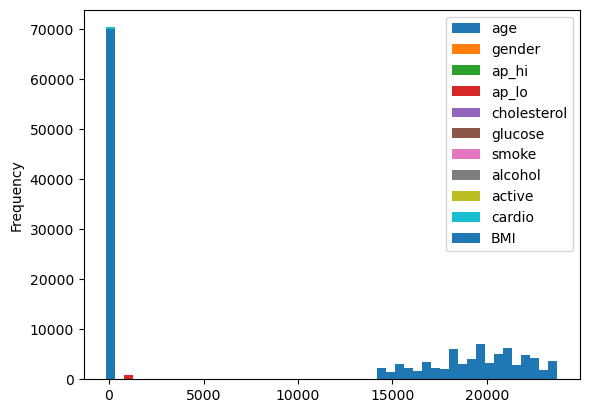

In [63]:
cardio_data.plot.hist(bins=50)

In [64]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70295 non-null  float64
 1   gender       70294 non-null  float64
 2   ap_hi        70000 non-null  float64
 3   ap_lo        70294 non-null  float64
 4   cholesterol  70271 non-null  float64
 5   glucose      70286 non-null  float64
 6   smoke        70295 non-null  float64
 7   alcohol      70295 non-null  float64
 8   active       70295 non-null  float64
 9   cardio       70294 non-null  float64
 10  BMI          70000 non-null  float64
dtypes: float64(11)
memory usage: 5.9 MB


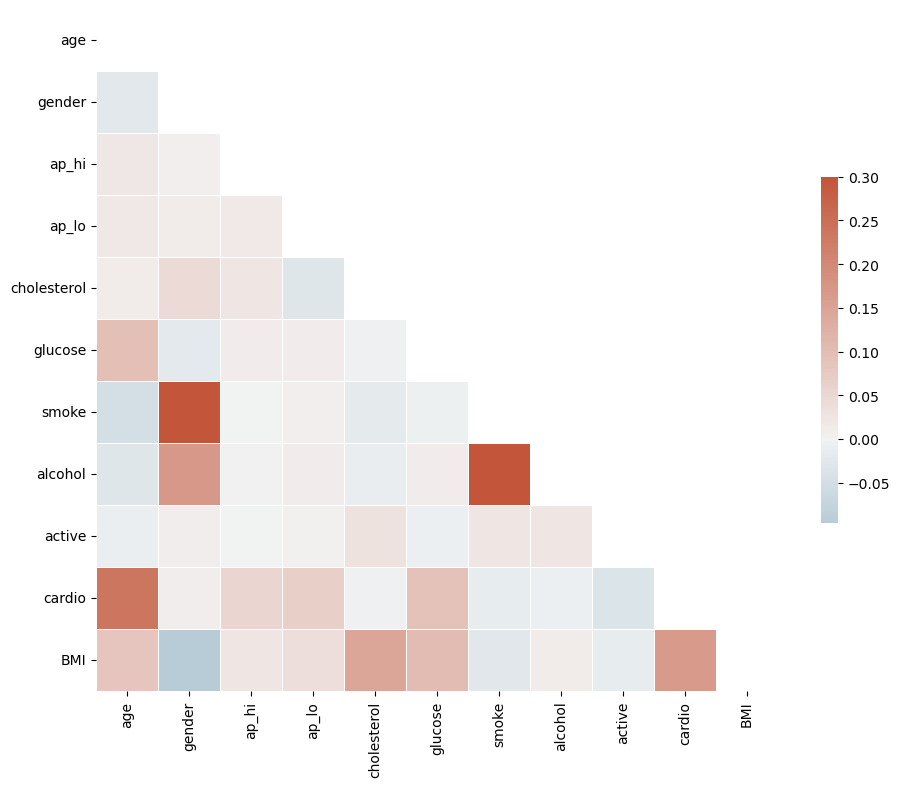

In [65]:
corr = cardio_data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [66]:
cardio_data.shape

(70295, 11)

In [67]:
cardio_data.isna().sum()

age              0
gender           1
ap_hi          295
ap_lo            1
cholesterol     24
glucose          9
smoke            0
alcohol          0
active           0
cardio           1
BMI            295
dtype: int64

In [68]:
# Impute missing values in the 'ap_hi' column with the median
cardio_data['ap_hi'] = cardio_data['ap_hi'].fillna(cardio_data['ap_hi'].median())

In [69]:
cardio_data.isna().sum()

age              0
gender           1
ap_hi            0
ap_lo            1
cholesterol     24
glucose          9
smoke            0
alcohol          0
active           0
cardio           1
BMI            295
dtype: int64

In [70]:
# Impute missing values in the 'bmi' column with the median and assign it back
cardio_data['BMI'] = cardio_data['BMI'].fillna(cardio_data['BMI'].median())

# Check if there are any remaining NaN values
print(cardio_data['BMI'].isnull().sum())

0


In [71]:
cardio_data.isna().sum()

age             0
gender          1
ap_hi           0
ap_lo           1
cholesterol    24
glucose         9
smoke           0
alcohol         0
active          0
cardio          1
BMI             0
dtype: int64

In [72]:
cardio_data['cholesterol'] = cardio_data['cholesterol'].fillna(cardio_data['cholesterol'].median())

print(cardio_data['cholesterol'].isnull().sum())

0


In [73]:
# Impute missing values in the 'glucose' column with the median and assign it back
cardio_data['glucose'] = cardio_data['glucose'].fillna(cardio_data['glucose'].median())

# Check if there are any remaining NaN values
print(cardio_data['glucose'].isnull().sum())

0


In [74]:
cardio_data.isna().sum()

age            0
gender         1
ap_hi          0
ap_lo          1
cholesterol    0
glucose        0
smoke          0
alcohol        0
active         0
cardio         1
BMI            0
dtype: int64

In [75]:
# Remove rows where 'cardio' has NaN values
cardio_data = cardio_data.dropna(subset=['cardio'])
cardio_data = cardio_data.dropna(subset=['ap_lo'])

Accuracy: 0.7373512257575039
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75     10461
         1.0       0.76      0.70      0.73     10628

    accuracy                           0.74     21089
   macro avg       0.74      0.74      0.74     21089
weighted avg       0.74      0.74      0.74     21089

[[8137 2324]
 [3215 7413]]


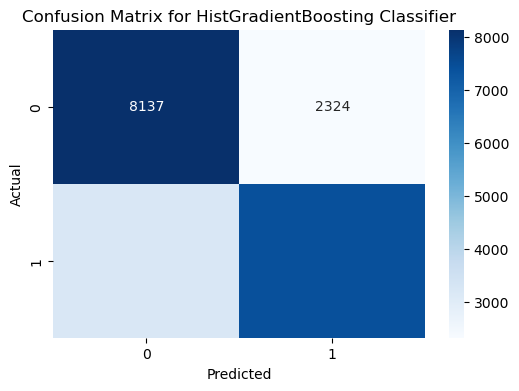

In [76]:
# Remove rows where 'cardio' has NaN values
#cardio_data = cardio_data.dropna(subset=['cardio'])

# Proceed with training after removing NaN values
X = cardio_data.drop(columns=['cardio'])  # Features
y = cardio_data['cardio']  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred)

print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for HistGradientBoosting Classifier')
plt.show()

In [77]:
print(len(y_test))   
print(len(y_pred))

21089
21089


In [78]:
# Define features (X) and target (y)
X = cardio_data.drop(columns=['cardio'])  # Features
y = cardio_data['cardio']  # Target

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the SGDClassifier (you can tweak the parameters as needed)
sgd_classifier = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

# 4. Train the Model
sgd_classifier.fit(X_train, y_train)

# 5. Make Predictions
y_pred = sgd_classifier.predict(X_test)

# 6. Evaluate the Model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred)

print(cm)

Accuracy: 0.4965621888188155
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.66     10461
         1.0       0.67      0.00      0.00     10628

    accuracy                           0.50     21089
   macro avg       0.58      0.50      0.33     21089
weighted avg       0.58      0.50      0.33     21089

[[10450    11]
 [10606    22]]


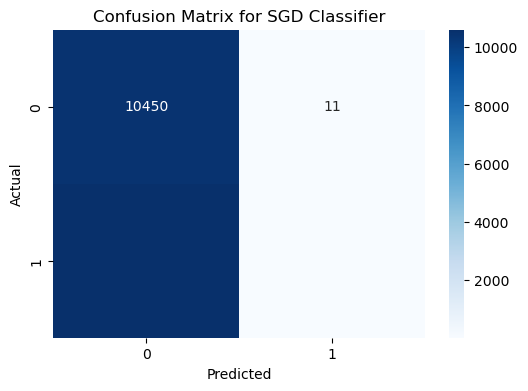

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SGD Classifier')
plt.show()

In [80]:
X_train.isna().sum()

age            0
gender         0
ap_hi          0
ap_lo          0
cholesterol    0
glucose        0
smoke          0
alcohol        0
active         0
BMI            0
dtype: int64

In [81]:
# Define features (X) and target (y)
X = cardio_data.drop(columns=['cardio'])  # Features
y = cardio_data['cardio']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7133102565318412
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72     10461
         1.0       0.73      0.69      0.71     10628

    accuracy                           0.71     21089
   macro avg       0.71      0.71      0.71     21089
weighted avg       0.71      0.71      0.71     21089



In [82]:
# Define features (X) and target (y)
X = cardio_data.drop(columns=['cardio'])  # Features
y = cardio_data['cardio']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7133102565318412
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72     10461
         1.0       0.73      0.69      0.71     10628

    accuracy                           0.71     21089
   macro avg       0.71      0.71      0.71     21089
weighted avg       0.71      0.71      0.71     21089



In [83]:
cardio_data.head(20)

,age,gender,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio,BMI
0,18393.0,2.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120
1,20228.0,1.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679
2,18857.0,1.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805
3,17623.0,2.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479
4,17474.0,1.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177
5,21914.0,1.0,120.0,80.0,2.0,2.0,0.0,0.0,0.0,0.0,29.384676
6,22113.0,1.0,130.0,80.0,3.0,1.0,0.0,0.0,1.0,0.0,37.729725
7,22584.0,2.0,130.0,90.0,3.0,3.0,0.0,0.0,1.0,1.0,29.983588
8,17668.0,1.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,28.440955
9,19834.0,1.0,110.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,25.282570


In [84]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70294 entries, 0 to 70294
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70294 non-null  float64
 1   gender       70294 non-null  float64
 2   ap_hi        70294 non-null  float64
 3   ap_lo        70294 non-null  float64
 4   cholesterol  70294 non-null  float64
 5   glucose      70294 non-null  float64
 6   smoke        70294 non-null  float64
 7   alcohol      70294 non-null  float64
 8   active       70294 non-null  float64
 9   cardio       70294 non-null  float64
 10  BMI          70294 non-null  float64
dtypes: float64(11)
memory usage: 6.4 MB


In [85]:
import matplotlib.pyplot as plt

def plot_histograms(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(len(numeric_columns) // 3 + 1, 3))
    plt.tight_layout()
    plt.show()

In [86]:
""""
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the features before training the models
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifiers on scaled data
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

classifiers = {
    'SGD Classifier': SGDClassifier(max_iter=1000, random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary to store accuracy results
accuracy_results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Algorithm', 'Accuracy'])

plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Algorithm'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Algorithm Used on Cardio Data')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)"""

'"\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.preprocessing import StandardScaler\n\n# Scale the features before training the models\nscaler = StandardScaler()\n\n# Fit scaler on training data and transform both train and test sets\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Train classifiers on scaled data\nfor name, clf in classifiers.items():\n    clf.fit(X_train_scaled, y_train)\n    y_pred = clf.predict(X_test_scaled)\n    accuracy = accuracy_score(y_test, y_pred)\n    accuracy_results[name] = accuracy\n\nclassifiers = {\n    \'SGD Classifier\': SGDClassifier(max_iter=1000, random_state=42),\n    \'HistGradientBoosting\': HistGradientBoostingClassifier(random_state=42),\n    \'Logistic Regression\': LogisticRegression(max_iter=1000, random_state=42),\n    \'Random Forest\': RandomForestClassifier(random_state=42)\n}\n\n# Dictionary to store accuracy results\naccuracy_results = {}\n\nfor name, clf in classifiers.item

### P-2


In [87]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

# Assuming cardio_data is already defined and cleaned
features = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke', 'glucose', 'alcohol', 'active', 'BMI']
target = 'cardio'

# Initialize an empty dictionary to store correlation coefficients
correlation_dict = {}

for feature in features:
    correlation, _ = pointbiserialr(cardio_data[feature], cardio_data[target])
    correlation_dict[feature] = correlation

# Convert the dictionary to a DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlation with Target'])
correlation_df = correlation_df.sort_values(by='Correlation with Target', ascending=False)

# Display the correlation DataFrame
print(correlation_df)


       Feature  Correlation with Target
0          age                 0.237546
9          BMI                 0.165498
6      glucose                 0.089524
3        ap_lo                 0.066135
2        ap_hi                 0.054427
1       gender                 0.008182
4  cholesterol                -0.002533
7      alcohol                -0.007037
5        smoke                -0.015089
8       active                -0.036134


#### permuataion feature importance

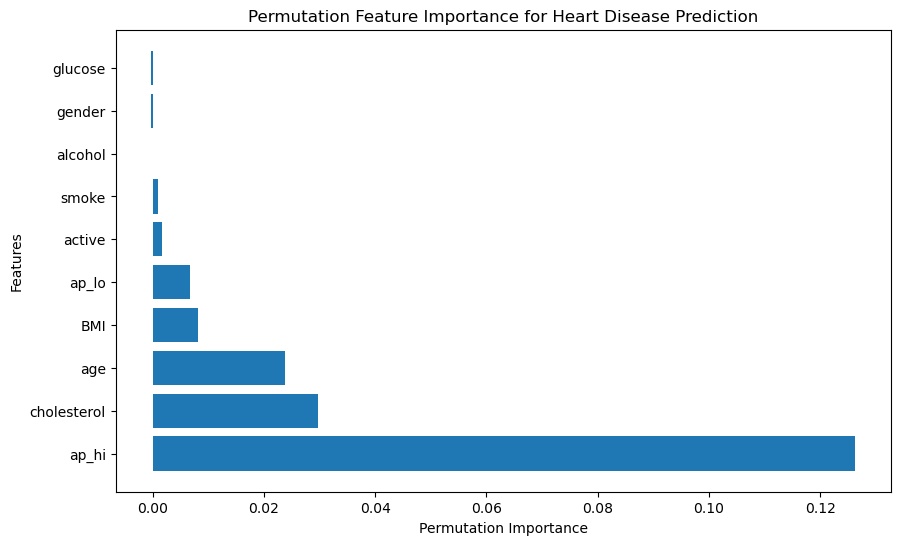

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

features = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke', 'glucose', 'alcohol', 'active', 'BMI']
target = 'cardio'

if cardio_data[target].isnull().any():
    print("Warning: NaN values found in the target variable. Dropping NaNs.")
    cardio_data = cardio_data.dropna(subset=[target])

cardio_data[target] = cardio_data[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(cardio_data[features], cardio_data[target], test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)

feature_importances = perm_importance.importances_mean

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation Feature Importance for Heart Disease Prediction")
plt.show()


#### permutation feature importance using ExtraTreesClassifier

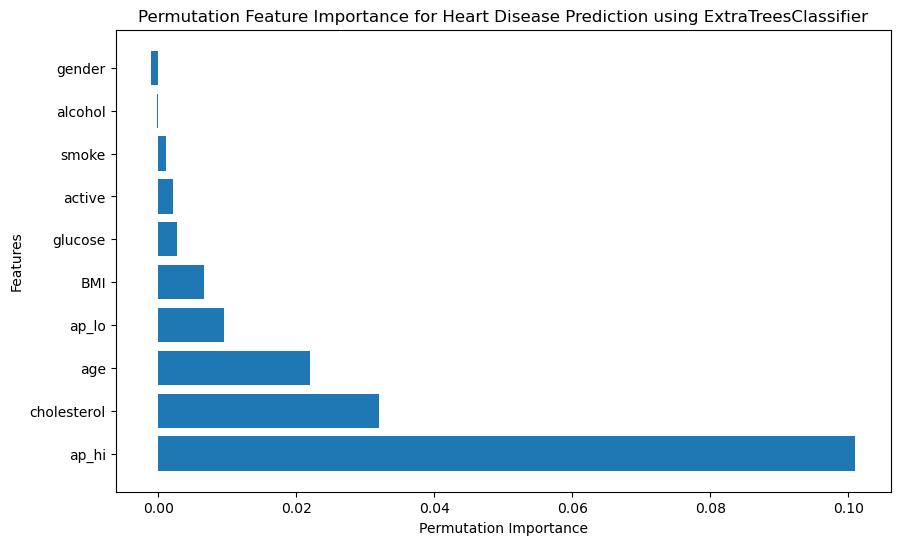

In [89]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

features = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke', 'glucose', 'alcohol', 'active', 'BMI']
target = 'cardio'

if cardio_data[target].isnull().any():
    print("Warning: NaN values found in the target variable. Dropping NaNs.")
    cardio_data = cardio_data.dropna(subset=[target])

cardio_data[target] = cardio_data[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(cardio_data[features], cardio_data[target], test_size=0.3, random_state=42)

extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees.fit(X_train, y_train)

perm_importance = permutation_importance(extra_trees, X_test, y_test, n_repeats=10, random_state=42)

feature_importances = perm_importance.importances_mean

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation Feature Importance for Heart Disease Prediction using ExtraTreesClassifier")
plt.show()

#### Feature Weights

In [90]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def calculate_feature_weights(cardio_data, m):
   
    features = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke', 'glucose', 'alcohol', 'active', 'BMI']
    target = 'cardio'

    X = cardio_data[features].values
    y = cardio_data[target].values

    
    n = X.shape[0]  
    d = X.shape[1]  
    W = np.zeros(d)  

    nbrs = NearestNeighbors(n_neighbors=2).fit(X)

    for k in range(m):
        target_index = np.random.choice(n)
        Rk = X[target_index]
        label_Rk = y[target_index]

        distances, indices = nbrs.kneighbors([Rk])
        nearest_indices = indices[0]
        
       
        H = None
        M = None
        
        for index in nearest_indices:
            if y[index] == label_Rk:
                H = X[index]
                break

        for index in nearest_indices:
            if y[index] != label_Rk:
                M = X[index]
                break

        if H is None or M is None:
            continue  

        for A in range(d):
            diff_H = Rk[A] - H[A]  
            diff_M = Rk[A] - M[A]  
            W[A] -= diff_H / m
            W[A] += diff_M / m

    return W

m = 100  
weights = calculate_feature_weights(cardio_data, m)

print("Feature Weights:", weights)

Feature Weights: [-0.14        0.02        0.1         0.07        0.07        0.
  0.05        0.         -0.05        0.27473998]


In [91]:
cardio_data = cardio_data.astype({'age': 'int',
                                   'gender': 'int',
                                   'ap_hi': 'int',
                                   'ap_lo': 'int',
                                   'cholesterol': 'int',
                                   'smoke': 'int',
                                   'glucose': 'int',
                                   'alcohol': 'int',
                                   'active': 'int',
                                   'BMI': 'int',
                                   'cardio': 'int'})  

print(cardio_data.dtypes)

age            int32
gender         int32
ap_hi          int32
ap_lo          int32
cholesterol    int32
glucose        int32
smoke          int32
alcohol        int32
active         int32
cardio         int32
BMI            int32
dtype: object


In [92]:
print(cardio_data[target].value_counts())
print(cardio_data[target].dtype)


cardio
0    35209
1    35085
Name: count, dtype: int64
int32


In [93]:
cardio_data[target] = cardio_data[target].astype(int)

In [94]:
X = cardio_data[features]
y = cardio_data[target]

print("Feature set shape:", X.shape)
print("Target shape:", y.shape)
print("Unique target values:", y.unique())


Feature set shape: (70294, 10)
Target shape: (70294,)
Unique target values: [0 1]


#### mRMR feature selection

In [95]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

def mutual_info_score(X, y):
    return mutual_info_classif(X, y, discrete_features=True)

def mrmr_selection(data, target, num_features):
   
    
    X = data.drop(columns=[target])
    y = data[target]
    
    relevance = mutual_info_score(X.values, y.values)
    
    selected_features = []
    mrmr_values = {}

    for feature in X.columns:
        mrmr_values[feature] = relevance[X.columns.get_loc(feature)]

    while len(selected_features) < num_features:
        max_mrmr_feature = max(mrmr_values, key=lambda x: mrmr_values[x])
        selected_features.append(max_mrmr_feature)
        
        del mrmr_values[max_mrmr_feature]
        
        for feature in mrmr_values.keys():
            redundancy = mutual_info_classif(X[[max_mrmr_feature, feature]].values, y.values, discrete_features=True)[1]
            mrmr_values[feature] -= redundancy

    return selected_features

features = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke', 'glucose', 'alcohol', 'active', 'BMI']
target = 'cardio'

selected_features = mrmr_selection(cardio_data[features + [target]], target, num_features=5)

print("Selected Features using mRMR:", selected_features)


Selected Features using mRMR: ['ap_hi', 'age', 'alcohol', 'gender', 'smoke']


#### custom FCMIM algorithm in reference to research paper

In [96]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data, target):
    data = data.dropna(subset=[target])
    data[target] = data[target].astype(int)

    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

def compute_mutual_info(X, y):
    return mutual_info_classif(X, y, discrete_features=True)

def feature_selection(data, target, K):
    data = preprocess_data(data, target)

    X = data.drop(columns=[target])
    y = data[target]

    selected_features = set()  
    feature_names = X.columns.tolist()

    Mi = compute_mutual_info(X, y)
    pi = Mi.copy()
    Li = np.zeros(len(feature_names))

    for k in range(K):
        score_k = 0
        for i, feature in enumerate(feature_names):
            if feature in selected_features:
                continue

            while pi[i] > score_k and Li[i] < k - 1:
                Li[i] += 1
                CMI = np.mean(Mi)  
                pi[i] = min(pi[i], CMI)  
            
            
            if pi[i] > score_k:
                score_k = pi[i]
                selected_features.add(feature)  

    return list(selected_features)

target = 'cardio' 
K = 5  

selected_features = feature_selection(cardio_data, target, K)

print("Selected Features:", selected_features)


Selected Features: ['age', 'ap_hi', 'glucose', 'ap_lo', 'gender', 'active', 'BMI', 'smoke', 'cholesterol']


#### using RandomForestClassifier and feature selection using FCMIM (customized)

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

def preprocess_data(data, target):
    data = data.dropna(subset=[target])
    data[target] = data[target].astype(int)

    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

def compute_mutual_info(X, y):
    return mutual_info_classif(X, y, discrete_features=True)

def feature_selection(data, target, num_features):
    X = data.drop(columns=[target])
    y = data[target]

    mi_scores = compute_mutual_info(X, y)

    top_features = np.argsort(mi_scores)[-num_features:]

    return X.columns[top_features].tolist()

def train_classifier(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

def validate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, conf_matrix, class_report

def main(data, target='cardio', num_features=5):
    processed_data = preprocess_data(data, target)

    selected_features = feature_selection(processed_data, target, num_features)
    print("Selected Features:", selected_features)

    X = processed_data[selected_features]
    y = processed_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = train_classifier(X_train, y_train)

    accuracy, conf_matrix, class_report = validate_classifier(model, X_test, y_test)

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)


main(cardio_data, target='cardio', num_features=5)

Selected Features: ['BMI', 'cholesterol', 'ap_lo', 'age', 'ap_hi']
Accuracy: 0.6733764848139981
Confusion Matrix:
 [[4678 2321]
 [2271 4789]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      6999
           1       0.67      0.68      0.68      7060

    accuracy                           0.67     14059
   macro avg       0.67      0.67      0.67     14059
weighted avg       0.67      0.67      0.67     14059



In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.735087897571385


#### using ExtraTreesClassifier and feature selection using FCMIM (customized)

In [99]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

features = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke', 'glucose', 'alcohol', 'active', 'BMI']
target = 'cardio'

if cardio_data[target].isnull().any():
    print("Warning: NaN values found in the target variable. Dropping NaNs.")
    cardio_data = cardio_data.dropna(subset=[target])

cardio_data[target] = cardio_data[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(cardio_data[features], cardio_data[target], test_size=0.3, random_state=42)

extra_trees = ExtraTreesClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_extra_trees = grid_search.best_estimator_

y_pred = best_extra_trees.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.7278731836195508
Accuracy: 0.7297
Confusion Matrix:
 [[7914 2547]
 [3153 7475]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74     10461
           1       0.75      0.70      0.72     10628

    accuracy                           0.73     21089
   macro avg       0.73      0.73      0.73     21089
weighted avg       0.73      0.73      0.73     21089

